*   initial libs and check for missing values
*   reverse ordering of dataFrame rows and reset index
*   convert date column format
*   Visualizing bitcoin data
*   building random forest mode

# initial libs and check for missing values

In [66]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

--2021-07-03 16:07:03--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-07-03 16:07:03--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-07-03 16:07:03--  https://nchc.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving nchc.dl.sourceforge

In [67]:
# !pip install yfinance
# import yfinance as yf
import talib 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

plt.style.use('seaborn-darkgrid')
drive.mount('/content/drive')
path='/content/drive/MyDrive/DataSets/BitcoinHistoricalDataInvesting.csv'

df=pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# reverse ordering of dataFrame rows and reset index

In [68]:
df = df[::-1].reset_index(drop = True) 

# convert date column format

In [69]:
df['Date']= df['Date'].apply(lambda x: datetime.strptime(x, '%b %d, %Y').strftime('%Y-%m-%d'))

In [70]:
df.rename({'Price':'Close'}, axis=1 , inplace=True)
btc = df.copy()
btc.drop(['Date','Vol.','Change %'], axis=1 , inplace=True)
btc.head()

,Close,Open,High,Low
0,0.1,0.0,0.1,0.1
1,0.1,0.1,0.1,0.1
2,0.1,0.1,0.1,0.1
3,0.1,0.1,0.1,0.1
4,0.1,0.1,0.1,0.1


In [71]:
btc.shape

(3941, 4)

# Visualizing bitcoin data and indicators

*   SMA
*   EMA
*   RSI
*   Bollinger Bands

# SMA

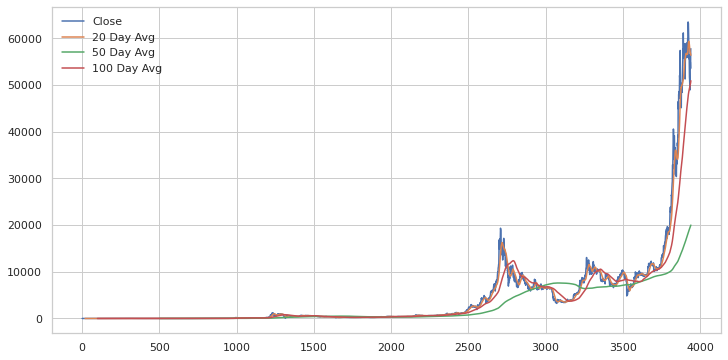

In [72]:
sns.set()
sns.set_style('whitegrid')
btc['Close'].plot(figsize=(12,6),label='Close')
btc['Close'].rolling(window=20).mean().plot(label='20 Day Avg')
btc['Close'].rolling(window=500).mean().plot(label='50 Day Avg')
btc['Close'].rolling(window=100).mean().plot(label='100 Day Avg')
plt.legend()

# EMA

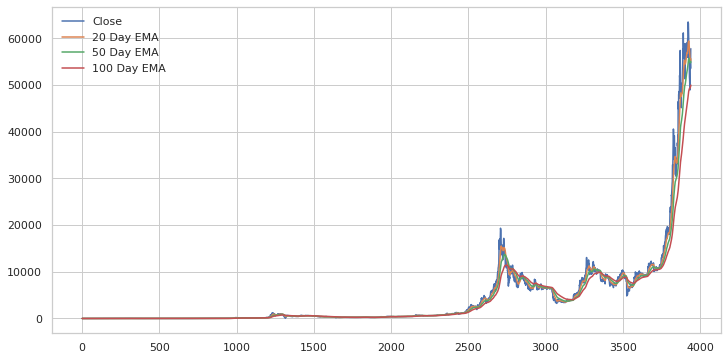

In [73]:
sns.set()
sns.set_style('whitegrid')
btc['Close'].plot(figsize=(12,6),label='Close')
btc['Close'].ewm(span=20,adjust=False).mean().plot(label='20 Day EMA')
btc['Close'].ewm(span=50,adjust=False).mean().plot(label='50 Day EMA')
btc['Close'].ewm(span=100,adjust=False).mean().plot(label='100 Day EMA')
plt.legend()

# RSI

            Date    Close     Open  ...     Vol.  Change %        RSI
14    2010-08-01      0.1      0.1  ...    2.60K     0.00%        NaN
15    2010-08-02      0.1      0.1  ...    3.60K     0.00%        NaN
16    2010-08-03      0.1      0.1  ...    9.82K     0.00%        NaN
17    2010-08-04      0.1      0.1  ...    3.49K     0.00%        NaN
18    2010-08-05      0.1      0.1  ...    5.03K     0.00%        NaN
...          ...      ...      ...  ...      ...       ...        ...
3936  2021-04-27  55036.5  54011.1  ...   84.08K     1.88%  48.298927
3937  2021-04-28  54841.4  55036.0  ...   86.96K    -0.35%  47.844811
3938  2021-04-29  53560.8  54838.6  ...   83.90K    -2.34%  44.863145
3939  2021-04-30  57720.3  53562.3  ...  103.74K     7.77%  54.731274
3940  2021-05-01  57807.1  57719.1  ...   63.41K     0.15%  54.912622

[3927 rows x 8 columns]


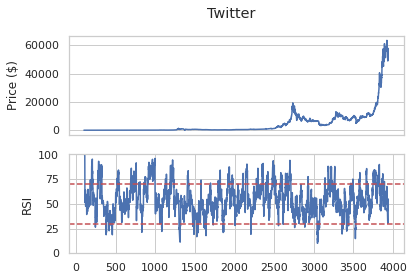

In [74]:
delta = df['Close'].diff()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down

df['RSI'] = 100 - (100/(1 + rs))
df = df.iloc[14:]

print(df)
fig, (ax1, ax2) = plt.subplots(2)
ax1.get_xaxis().set_visible(False)
fig.suptitle('Twitter')

df['Close'].plot(ax=ax1)
ax1.set_ylabel('Price ($)')
df['RSI'].plot(ax=ax2)
ax2.set_ylim(0,100)
ax2.axhline(30, color='r', linestyle='--')
ax2.axhline(70, color='r', linestyle='--')
ax2.set_ylabel('RSI')

plt.show()

#Bollinger Bands


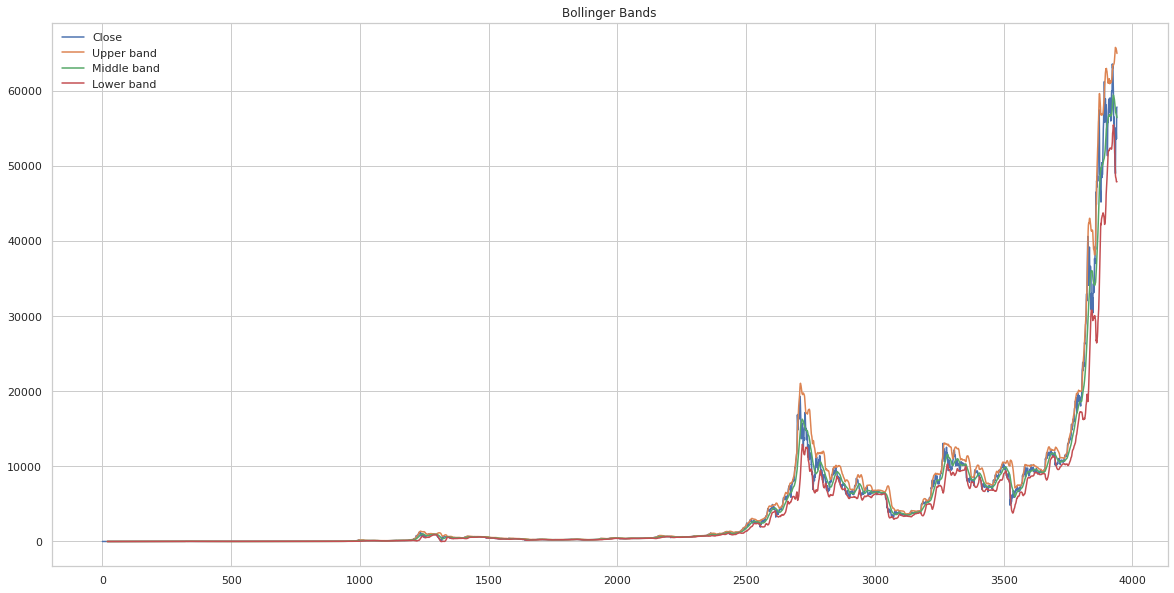

In [83]:
upper, mid, lower = talib.BBANDS(btc['Close'], nbdevup=2, nbdevdn=2, timeperiod=20)
btc['Close'].plot(figsize=(20,10),label='Close')
plt.plot(upper, label="Upper band")
plt.plot(mid, label='Middle band')
plt.plot(lower, label='Lower band')
plt.title('Bollinger Bands')
plt.legend()
plt.show()